In [25]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from matplotlib import pyplot as plt
# import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import string

In [2]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

In [3]:
train_df.head()

,index,title,text,subject,date,class,Unnamed: 6
0,0,PRESIDENT TRUMP Explains New “America First” R...,That s what we re talking about! Another campa...,politics,"Aug 2, 2017",Fake,NaN
1,1,TERMINALLY ILL FORMER MISS WI: “Until my last ...,How is it that Sean Hannity is the only media ...,politics,"Oct 4, 2016",Fake,NaN
2,2,Cruz Humiliated By Moderator After Lie About ...,Almost immediately after learning that longtim...,News,"February 13, 2016",Fake,NaN
3,3,"Russia revels in Trump victory, looks to sanct...",MOSCOW (Reuters) - For all their mutual praise...,politicsNews,"November 9, 2016",Real,NaN
4,4,Trump's bid to open U.S. monuments to developm...,WASHINGTON (Reuters) - The Trump administratio...,politicsNews,"May 26, 2017",Real,NaN


In [5]:
train_df.shape

(40000, 7)

In [10]:
Fake_len = train_df[train_df['class'] == 'Fake'].shape[0]
Real_len = train_df[train_df['class'] == 'Real'].shape[0]

In [11]:
Fake_len

20886

In [12]:
Real_len

19113

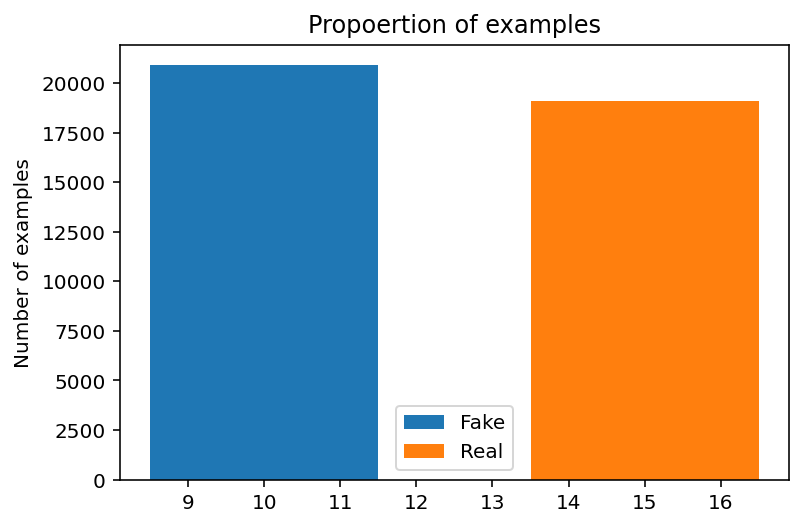

In [13]:
plt.bar(10,Fake_len,3, label="Fake")
plt.bar(15,Real_len,3, label="Real")
plt.legend()
plt.ylabel('Number of examples')
plt.title('Propoertion of examples')
plt.show()

In [16]:
train_df = train_df.drop(['Unnamed: 6'], axis = 1)

In [17]:
train_df

,index,title,text,subject,date,class
0,0,PRESIDENT TRUMP Explains New “America First” R...,That s what we re talking about! Another campa...,politics,"Aug 2, 2017",Fake
1,1,TERMINALLY ILL FORMER MISS WI: “Until my last ...,How is it that Sean Hannity is the only media ...,politics,"Oct 4, 2016",Fake
2,2,Cruz Humiliated By Moderator After Lie About ...,Almost immediately after learning that longtim...,News,"February 13, 2016",Fake
3,3,"Russia revels in Trump victory, looks to sanct...",MOSCOW (Reuters) - For all their mutual praise...,politicsNews,"November 9, 2016",Real
4,4,Trump's bid to open U.S. monuments to developm...,WASHINGTON (Reuters) - The Trump administratio...,politicsNews,"May 26, 2017",Real
...,...,...,...,...,...,...
39995,39995,U.S. officials step up rhetoric on Russia link...,(Reuters) - Republican vice presidential candi...,politicsNews,"October 16, 2016",Real
39996,39996,McDonald’s Manager To Hispanic Customer: ‘Can...,An employee working at a North Carolina McDona...,News,"September 13, 2017",Fake
39997,39997,SMUG LIBERAL LAW PROFESSOR SHUT DOWN BY TUCKER...,Tucker to sanctuary city supporter: how did a ...,politics,"Mar 29, 2017",Fake
39998,39998,Robert Parry: Sorting Out the Russia Mess,Consortium News Exclusive: The U.S. mainstream...,US_News,"October 31, 2017",Fake


In [18]:
train_df = train_df.drop(['subject','date'], axis = 1)

In [19]:
train_df.head()

,index,title,text,class
0,0,PRESIDENT TRUMP Explains New “America First” R...,That s what we re talking about! Another campa...,Fake
1,1,TERMINALLY ILL FORMER MISS WI: “Until my last ...,How is it that Sean Hannity is the only media ...,Fake
2,2,Cruz Humiliated By Moderator After Lie About ...,Almost immediately after learning that longtim...,Fake
3,3,"Russia revels in Trump victory, looks to sanct...",MOSCOW (Reuters) - For all their mutual praise...,Real
4,4,Trump's bid to open U.S. monuments to developm...,WASHINGTON (Reuters) - The Trump administratio...,Real


In [21]:
train_df = train_df.drop(['text'], axis = 1)

In [22]:
train_df

,index,title,class
0,0,PRESIDENT TRUMP Explains New “America First” R...,Fake
1,1,TERMINALLY ILL FORMER MISS WI: “Until my last ...,Fake
2,2,Cruz Humiliated By Moderator After Lie About ...,Fake
3,3,"Russia revels in Trump victory, looks to sanct...",Real
4,4,Trump's bid to open U.S. monuments to developm...,Real
...,...,...,...
39995,39995,U.S. officials step up rhetoric on Russia link...,Real
39996,39996,McDonald’s Manager To Hispanic Customer: ‘Can...,Fake
39997,39997,SMUG LIBERAL LAW PROFESSOR SHUT DOWN BY TUCKER...,Fake
39998,39998,Robert Parry: Sorting Out the Russia Mess,Fake


In [23]:
train_df = train_df.drop(['index'], axis = 1)

In [24]:
train_df.head()

,title,class
0,PRESIDENT TRUMP Explains New “America First” R...,Fake
1,TERMINALLY ILL FORMER MISS WI: “Until my last ...,Fake
2,Cruz Humiliated By Moderator After Lie About ...,Fake
3,"Russia revels in Trump victory, looks to sanct...",Real
4,Trump's bid to open U.S. monuments to developm...,Real


In [26]:
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [29]:
train_df['title'] = train_df['title'].apply(remove_punctuation)
train_df.head(5)

,title,class
0,PRESIDENT TRUMP Explains New “America First” R...,Fake
1,TERMINALLY ILL FORMER MISS WI “Until my last b...,Fake
2,Cruz Humiliated By Moderator After Lie About ...,Fake
3,Russia revels in Trump victory looks to sancti...,Real
4,Trumps bid to open US monuments to development...,Real


In [32]:
sw = stopwords.words('english')

In [33]:
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [34]:
def stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    return " ".join(text)

In [35]:
train_df['title'] = train_df['title'].apply(stopwords)
train_df.head(5)

,title,class
0,president trump explains new “america first” r...,Fake
1,terminally ill former miss wi “until last brea...,Fake
2,cruz humiliated moderator lie presidents appoi...,Fake
3,russia revels trump victory looks sanctions re...,Real
4,trumps bid open us monuments development draws...,Real


In [37]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit(train_df['title'])
dictionary = count_vectorizer.vocabulary_.items()  

In [38]:
vocab = []
count = []
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
vocab_bef_stem = pd.Series(count, index=vocab)
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

In [41]:
vocab_bef_stem.head(20)

žižek            22556
état             22555
zurichs          22554
zurich           22553
zummar           22552
zumas            22551
zuma             22550
zulia            22549
zuckerberg       22548
zucker           22547
zschaepe         22546
zoos             22545
zoolander        22544
zoo              22543
zones            22542
zone             22541
zombiehillary    22540
zombie           22539
zohra            22538
zoellick         22537
dtype: int64

In [42]:
stemmer = SnowballStemmer("english")

def stemming(text):    
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [43]:
train_df['title'] = train_df['title'].apply(stemming)
train_df['title'].head(10)

0    presid trump explain new “america first” rais ...
1    termin ill former miss wi “until last breath u...
2    cruz humili moder lie presid appoint justic el...
3      russia revel trump victori look sanction relief
4    trump bid open us monument develop draw call p...
5    unreal here ice releas didn't deport 19723 cri...
6    consequ liber toler isi flag hang roof…yet one...
7    us news world report publish list top 10 popul...
8    trump administr nafta demand make sens union p...
9    turk flock social media gold trader sanction case
Name: title, dtype: object

In [47]:
tfid_vectorizer = TfidfVectorizer()
tfid_vectorizer.fit(train_df['title'])
dictionary = tfid_vectorizer.vocabulary_.items()  